In [32]:
!pip install wandb

In [33]:
# Task 1 -- Loading the datasets and the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import random

In [34]:
import os
import json
import requests
import shutil



> Plotting a sample image for each class


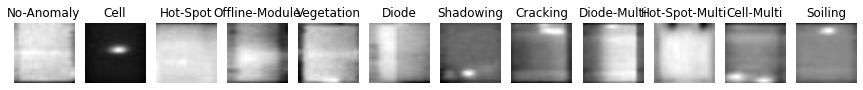

Number of images in the training set = 18000
Number of images in the validation set = 1000
Number of images in the test set = 1000
Number of classes = 12
Number of features per example = 784


In [35]:
import numpy as np
import json
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

class_labels = ['Cell', 'Cell-Multi', 'Cracking', 'Hot-Spot', 'Hot-Spot-Multi',
                'Shadowing', 'Diode', 'Diode-Multi', 'Vegetation', 'Soiling',
                'Offline-Module', 'No-Anomaly']
def preprocess_pv_fault(data_dir):
    metadata_file = os.path.join("module_metadata.json")

    # Load module metadata
    with open(metadata_file, 'r') as f:
        module_metadata = json.load(f)

    # Create lists to store image paths and labels
    image_paths = []
    labels = []

    # Iterate through the metadata and extract image paths and labels
    for image_info in module_metadata.values():
        image_path = os.path.join(image_info["image_filepath"])
        label = image_info["anomaly_class"]
        image_paths.append(image_path)
        labels.append(label)
        
    # Display one image from each class along with its label
    display_images(image_paths, labels)
    
    # Load and preprocess images
    images = []
    for image_path in image_paths:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((28, 28))  # Resize to match the Fashion-MNIST size
        image = np.array(image).flatten().astype('float32') / 255.0
        images.append(image)

    # Convert labels to one-hot encoded format
    unique_labels = list(set(labels))
    label_to_index = {label: i for i, label in enumerate(unique_labels)}
    num_classes = len(unique_labels)
    y = np.array([label_to_index[label] for label in labels])
    y = np.eye(num_classes)[y]

    # Split the data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(images, y, test_size=0.1, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Convert data to numpy arrays and transpose them
    X_train = np.array(X_train).T
    X_val = np.array(X_val).T
    X_test = np.array(X_test).T
    y_train = y_train.T
    y_val = y_val.T
    y_test = y_test.T

    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

def display_images(image_paths, labels):
    class_to_image = {}
    for i in range(len(image_paths)):
        if labels[i] not in class_to_image:
            class_to_image[labels[i]] = image_paths[i]

    plt.figure(figsize=(12, 6))
    i=0
    for class_idx, image_path in class_to_image.items():
#         class_idx = int(class_idx)  # Convert class_idx to integer
        img = Image.open(image_path).convert('L')
        img = img.resize((100, 100))  # Resize for display
        
        plt.subplot(2, len(class_to_image), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(class_idx)
        plt.axis('off')
        i+=1

    plt.tight_layout()
    plt.show()


# Specify the data directory where module_metadata.json and the 'images' folder are located
data_directory = "C:\\Users\\Adhithya Laxman\\Desktop\\Neural Networks\\PV_Fault"

# Preprocess the PV_fault dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test, num_classes = preprocess_pv_fault(data_directory)

# Print dataset information
print("Number of images in the training set =", X_train.shape[1])
print("Number of images in the validation set =", X_val.shape[1])
print("Number of images in the test set =", X_test.shape[1])
print("Number of classes =", num_classes)
print("Number of features per example =", X_train.shape[0])


In [36]:
import numpy as np
import json
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

class_labels = ['Cell', 'Cell-Multi', 'Cracking', 'Hot-Spot', 'Hot-Spot-Multi',
                'Shadowing', 'Diode', 'Diode-Multi', 'Vegetation', 'Soiling',
                'Offline-Module', 'No-Anomaly']

def preprocess_pv_fault(data_dir):
    metadata_file = os.path.join("module_metadata.json")

    # Load module metadata
    with open(metadata_file, 'r') as f:
        module_metadata = json.load(f)

    # Create lists to store image paths and labels
    image_paths = []
    labels = []

    # Iterate through the metadata and extract image paths and labels
    for image_info in module_metadata.values():
        image_path = os.path.join(image_info["image_filepath"])
        label = image_info["anomaly_class"]
        image_paths.append(image_path)
        labels.append(label)

    # Load and preprocess images
    images = []
    for image_path in image_paths:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((28, 28))  # Resize to match the Fashion-MNIST size
        image = np.array(image).flatten().astype('float32') / 255.0
        images.append(image)

    # Convert labels to binary format: 0 for 'No-Anomaly', 1 for all other classes
    y = np.array([0 if label == 'No-Anomaly' else 1 for label in labels])

    # Split the data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(images, y, test_size=0.1, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Convert data to numpy arrays and transpose them
    X_train = np.array(X_train).T
    X_val = np.array(X_val).T
    X_test = np.array(X_test).T
    y_train = y_train.reshape(1, -1)
    y_val = y_val.reshape(1, -1)
    y_test = y_test.reshape(1, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test



def display_images(image_paths, labels):
    class_to_image = {}
    for i in range(len(image_paths)):
        if labels[i] not in class_to_image:
            class_to_image[labels[i]] = image_paths[i]

    plt.figure(figsize=(12, 6))
    i=0
    for class_idx, image_path in class_to_image.items():
#         class_idx = int(class_idx)  # Convert class_idx to integer
        img = Image.open(image_path).convert('L')
        img = img.resize((100, 100))  # Resize for display
        
        plt.subplot(2, len(class_to_image), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(class_idx)
        plt.axis('off')
        i+=1

    plt.tight_layout()
    plt.show()


# Specify the data directory where module_metadata.json and the 'images' folder are located
data_directory = "C:\\Users\\Adhithya Laxman\\Desktop\\Neural Networks\\PV_Fault"

# Preprocess the PV_fault dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess_pv_fault(data_directory)

# Print dataset information
print("Number of images in the training set =", X_train.shape[1])
print("Number of images in the validation set =", X_val.shape[1])
print("Number of images in the test set =", X_test.shape[1])
print("Number of features per example =", X_train.shape[0])


Number of images in the training set = 18000
Number of images in the validation set = 1000
Number of images in the test set = 1000
Number of features per example = 784


In [37]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train)

(784, 18000)
(1, 18000)
(784, 1000)
(1, 1000)
[[0 1 0 ... 1 0 1]]


IMPLEMENTATION OF FEEDFORWARD NEURAL NETWORK:<br>
It takes the images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

ACTIVATION FUNCTION AND DERIVATIVES

In [38]:
# index = random.randrange(0,X_train.shape[1])
# plt.imshow(X_train[:, index].reshape(28,28), cmap = 'gray')
# plt.show()

In [39]:
def sigmoid(x):
    return 1. / (1.+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

def softmax_derivative(x):
    return softmax(x) * (1-softmax(x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x>0, dtype = np.float32)

Initializing parameters

In [40]:
# layer_dims = [X.shape[1],100,200,Y.shape[0]]
def initialize_parameters(layer_dims,init_mode):
    L = len(layer_dims)
    parameters = {}
    prev_updates = {}

    for l in range(1,L):

#         print(L)
        if init_mode == 'xavier':
              parameters[f"W{l}"]= np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2/(layer_dims[l]+layer_dims[l-1]))
        else:
              parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01  #the div is to prevent the vanishing gradient prob if the weights initialized at the beginning is too big
        parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))
        prev_updates[f"W{l}"] = np.zeros((layer_dims[l], layer_dims[l-1]))
        prev_updates[f"b{l}"] = np.zeros((layer_dims[l], 1))

    return parameters,prev_updates

In [41]:
layer_dims = [X_train.shape[0], 100, 200, Y_train.shape[0]]
print(layer_dims)
params, prev_u = initialize_parameters(layer_dims,'xavier')

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

[784, 100, 200, 1]
Shape of W1: (100, 784)
Shape of B1: (100, 1) 

Shape of W2: (200, 100)
Shape of B2: (200, 1) 

Shape of W3: (1, 200)
Shape of B3: (1, 1) 



FEED FORWARD NEURAL NETWORK:

Forward Propagation


In [42]:
def forward_prop(X, parameters, activation = 'relu'):
    forward_cache = {}
    L = len(parameters)//2
    forward_cache["A0"] = X

    for l in range(1, L):
        forward_cache[f"Z{l}"] = parameters[f"W{l}"].dot(forward_cache[f"A{l-1}"]) + parameters[f"b{l}"]
        if activation == 'relu':
            forward_cache[f"A{l}"] = relu(forward_cache[f"Z{l}"])
        else:
            forward_cache[f"A{l}"] = tanh(forward_cache[f"Z{l}"])


    forward_cache[f"Z{L}"] = parameters[f"W{L}"].dot(forward_cache[f"A{L-1}"]) + parameters[f"b{L}"]
    if forward_cache[f"Z{L}"].shape[0] == 1:
        forward_cache[f"A{L}"] = sigmoid(forward_cache[f"Z{L}"])
    else:
        forward_cache[f"A{L}"] = softmax(forward_cache[f"Z{L}"])

    return forward_cache[f"A{L}"], forward_cache




In [43]:
aL, forw_cache = forward_prop(X_train, params, 'relu')

for l in range(len(params)//2 + 1):
    print("Shape of A" + str(l) + " :", forw_cache['A' + str(l)].shape)

Shape of A0 : (784, 18000)
Shape of A1 : (100, 18000)
Shape of A2 : (200, 18000)
Shape of A3 : (1, 18000)



# Cost function


In [44]:
def compute_cost(AL, Y, parameters, lambd):
    m = Y.shape[1]
    L = len(parameters)//2
    if Y.shape[0] == 1:
        cost = -(1/m) * np.sum(Y*np.log(AL) + (1-Y)*np.log(1 - AL))
    else:
        cost = -(1/m) * np.sum(Y * np.log(AL))
        reg_sum = 0
        for l in range(1, L):
            reg_sum+=np.sum(np.square(parameters[f"W{l}"]))
        L2_reg_cost = (lambd/(2*m)) * (reg_sum)
        cost+=L2_reg_cost
    cost = np.squeeze(cost)

    return cost

Backward Propagation

In [45]:
def backward_propagation(AL , Y, parameters,forward_cache, activation, lambd = 0.7, batch_size = 512):
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]

    grads[f"dZ{L}"] = AL - Y
    grads[f"dW{L}"] = (1/m)*np.dot(grads[f"dZ{L}"], forward_cache[f"A{L-1}"].T) + (lambd*parameters[f"W{L}"])/m
    grads[f"db{L}"] = (1/m)*np.sum(grads[f"dZ{L}"], axis =1, keepdims  = True)

    for l in range(L-1, 0 , -1):
        if activation == 'relu':
            grads[f"dZ{l}"] = np.dot(parameters[f"W{l+1}"].T,grads[f"dZ{l+1}"]) * derivative_relu(forward_cache[f'A{l}'])
        else:
            grads[f"dZ{l}"] = np.dot(parameters[f"W{l+1}"].T,grads[f"dZ{l+1}"]) * derivative_tanh(forward_cache[f'A{l}'])

        grads[f"dW{l}"] = (1/batch_size)*np.dot(grads[f"dZ{l}"], forward_cache[f"A{l-1}"].T) + (lambd*parameters[f"W{l}"])/m
        grads[f"db{l}"] = (1/batch_size)*np.sum(grads[f"dZ{l}"], axis =1, keepdims  = True)

    return grads


In [46]:
grads = backward_propagation(forw_cache["A" + str(3)], Y_train, params, forw_cache, 'relu', 0.7)

for l in (range(1, len(grads)//3 + 1)):
    print("Shape of dZ" + str(l) + " :", grads['dZ' + str(l)].shape)
    print("Shape of dW" + str(l) + " :", grads['dW' + str(l)].shape)
    print("Shape of dB" + str(l) + " :", grads['db' + str(l)].shape, "\n")


Shape of dZ1 : (100, 18000)
Shape of dW1 : (100, 784)
Shape of dB1 : (100, 1) 

Shape of dZ2 : (200, 18000)
Shape of dW2 : (200, 100)
Shape of dB2 : (200, 1) 

Shape of dZ3 : (1, 18000)
Shape of dW3 : (1, 200)
Shape of dB3 : (1, 1) 



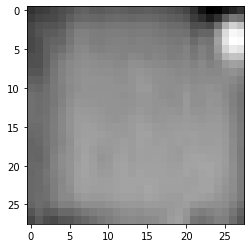

In [47]:
import random
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28,28), cmap = 'gray')
plt.show()
# # Define the neural network architecture

# # Input layer (784 features), 2 hidden layers (128 and 64 neurons), Output layer (10 classes)
layer_sizes = [784, 128,32,64,10]
# parameters, train_loss_history = train(X_train, y_train, layer_sizes, mode='xavier', activation='relu', loss_type='cross_entropy', num_epochs=5, learning_rate=0.1)

# # Make predictions on the test set
# y_pred = predict(X_test, parameters, layer_sizes,activation='relu')

# # Calculate accuracy on the test set
# accuracy = np.mean(np.argmax(y_pred, axis=0) == np.argmax(y_test, axis=1))
# print("Test Accuracy:", accuracy)



In [48]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2
    for l in range(1, L):
        parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate*grads[f'dW{l}']
        parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate*grads[f'db{l}']
    return parameters

In [49]:
def grad_desc(X, Y, layer_dims, learning_rate, activation = 'relu', n_epoch = 100, lambd = 0.7):

    parameters, prev_updates = initialize_parameters(layer_dims, 'xavier')

    for i in range(n_epoch):

        AL , forward_cache  = forward_prop(X, parameters, activation)

        cost = compute_cost(AL, Y, parameters, lambd)

        grads = backward_propagation(AL , Y, parameters,forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)

        if i % (n_epoch/10) == 0:
            print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))
        if i % 10 == 0:
            print("==", end = '')

    return parameters

In [50]:
def predict(X, y, parameters, activation):

    m = X.shape[1]
    y_pred, caches = forward_prop(X, parameters, activation)

    if y.shape[0] == 1:
        y_pred = np.array(y_pred > 0.5, dtype = 'float')
    else:
        y = np.argmax(y, 0)
        y_pred = np.argmax(y_pred, 0)
        print(y,y_pred)
        print(y.shape, y_pred.shape)

    return np.round(np.sum((y_pred == y)/m), 2)*100

In [118]:
layer_dims = [X_train.shape[0], 64,64,64, Y_train.shape[0]]
lr = 0.005
n_epoch = 1000
activation = 'tanh'
init_mode = 'xavier'

parameters = grad_desc(X_train, Y_train, layer_dims, lr, activation = activation, n_epoch = n_epoch, lambd = 0.7)

[9 3 9 ... 1 9 1] [9 9 9 ... 9 9 9]
(18000,) (18000,)
[ 2  9  2  2  3  7 11  9  7  9  4  7  5  7  8  9  9  9 10  9  8  9  3  9
 10  0  9  4  2  2  9  9  9 10  9 10  3  9  3  9  9 11  2  9  7  9  2  9
  9  7  8  3  9  9  9  7  2 11  9  9  9  9  9  2 10 11  9  8  8  9  4  9
  9 11  9  9  2  0  9  9 11  9  9  8 10  9  9  7  9  0  9  9  9  9  9  9
  9  3  3  9  1  8  8  7  3  9 10  3  5  9  9  7  9  0  9  8  9  9  9 10
  9  8  9  7  9  2  9  7  9  4  9  9  9  9  9  0  7  9  9  8  4  9  9  8
 10  7  9  9 10  2  9  5  5  2  9  9  9  9  9  3  9  8  9  0 10  9  9  2
  8  9 11  9  3  9  3 10  0  9  9  7  9  9  7 10  9  4  9  7  9 10  9  9
  4  9 10  9  7  4 11  9  9 10  2  8  2  9  7  9  9  9  7  9  9  9  9 11
  3 10  8 10  9 11 10  9  9  9  9  9  8  6  9  6  9  3  8  9  9 11  9  9
  9  9  7  2  9  9  9  2  9  4  9  5  4  6  9  9  8  9  3  2  4  9  6  9
  9  5  1  9  9  8 10  4  9  8  7 11  6  9  2 10  9  3  9  2  8  3  4 10
  2  9  9  9  9  9 10  9  2  9  9  9  1 10  7  9 10  8  9  6  0  9  1 

====================[9 3 9 ... 1 9 1] [9 9 9 ... 9 9 9]
(18000,) (18000,)
[ 2  9  2  2  3  7 11  9  7  9  4  7  5  7  8  9  9  9 10  9  8  9  3  9
 10  0  9  4  2  2  9  9  9 10  9 10  3  9  3  9  9 11  2  9  7  9  2  9
  9  7  8  3  9  9  9  7  2 11  9  9  9  9  9  2 10 11  9  8  8  9  4  9
  9 11  9  9  2  0  9  9 11  9  9  8 10  9  9  7  9  0  9  9  9  9  9  9
  9  3  3  9  1  8  8  7  3  9 10  3  5  9  9  7  9  0  9  8  9  9  9 10
  9  8  9  7  9  2  9  7  9  4  9  9  9  9  9  0  7  9  9  8  4  9  9  8
 10  7  9  9 10  2  9  5  5  2  9  9  9  9  9  3  9  8  9  0 10  9  9  2
  8  9 11  9  3  9  3 10  0  9  9  7  9  9  7 10  9  4  9  7  9 10  9  9
  4  9 10  9  7  4 11  9  9 10  2  8  2  9  7  9  9  9  7  9  9  9  9 11
  3 10  8 10  9 11 10  9  9  9  9  9  8  6  9  6  9  3  8  9  9 11  9  9
  9  9  7  2  9  9  9  2  9  4  9  5  4  6  9  9  8  9  3  2  4  9  6  9
  9  5  1  9  9  8 10  4  9  8  7 11  6  9  2 10  9  3  9  2  8  3  4 10
  2  9  9  9  9  9 10  9  2  9  9  9  1 10  7  9 1

KeyboardInterrupt: 

In [64]:
def update_params_momentum(parameters, grads, learning_rate, prev_updates):
    L = len(parameters) // 2
    beta = 0.9
    for l in range(1, L+1):
        prev_updates[f"W{l}"] = beta*prev_updates[f"W{l}"] + (1-beta)*grads[f"dW{l}"]
        parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate*prev_updates[f"W{l}"]

        prev_updates[f"b{l}"] = beta*prev_updates[f"b{l}"] + (1-beta)*grads[f"db{l}"]
        parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate*prev_updates[f"b{l}"]
    return parameters, prev_updates
def update_parameters_sgd(parameters, grads, learning_rate):
    pass

def update_params_rmsprop(parameters, grads, learning_rate, prev_rms):
    beta = 0.999
    L = len(parameters) // 2
    epsilon = 1e-6 #to prevent overshooting or 0 on the div
    for l in range(1, L+1):
        sdw = beta*prev_rms[f'W{l}'] + (1-beta)*np.multiply(grads[f"dW{l}"],grads[f"dW{l}"])
        sdb = beta*prev_rms[f'b{l}'] + (1-beta)*np.multiply(grads[f"db{l}"],grads[f"db{l}"])

        parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate*grads[f"dW{l}"]/(np.sqrt(sdw) + epsilon)
        parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate*grads[f"db{l}"]/(np.sqrt(sdb) + epsilon)
#         print("HEY WE ARE GETTING UPDATES")
        prev_rms[f'W{l}'] = sdw
        prev_rms[f'b{l}'] = sdb

    return parameters, prev_rms


def update_params_adam(parameters, grads, learning_rate, v, m, t):
    L = len(parameters) // 2 # number of layers in the neural network
    beta1 = 0.9 #default
    beta2 = 0.999 #default
    epsilon = 1e-8 #for numerical stability

    for l in range(1, L+1):
        mdw = beta1*m["W"+str(l)] + (1-beta1)*grads["dW"+str(l)]
        vdw = beta2*v["W"+str(l)] + (1-beta2)*np.square(grads["dW"+str(l)])
        mw_hat = mdw/(1.0 - beta1**t)
        vw_hat = vdw/(1.0 - beta2**t)

        parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * mw_hat)/np.sqrt(vw_hat + epsilon)

        mdb = beta1*m["b"+str(l)] + (1-beta1)*grads["db"+str(l)]
        vdb = beta2*v["b"+str(l)] + (1-beta2)*np.square(grads["db"+str(l)])
        mb_hat = mdb/(1.0 - beta1**t)
        vb_hat = vdb/(1.0 - beta2**t)

        parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * mb_hat)/np.sqrt(vb_hat + epsilon)

        v["dW"+str(l)] = vdw
        m["dW"+str(l)] = mdw
        v["db"+str(l)] = vdb
        m["db"+str(l)] = mdb

    t = t + 1 # timestep
    return parameters, v, m, t


In [52]:
def grad_desc_opt_bs(X, Y, layer_dims, learning_rate, init_mode = 'xavier',activation = 'relu', n_epoch = 100, lambd = 0.7, opt = 'adam', batch_size = 512):

    parameters, prev_updates = initialize_parameters(layer_dims, init_mode)
    v = prev_updates.copy()
    m = prev_updates.copy()
    # prev_updates['W0']  =0
    # prev_updates['b0'] = 0
    t=1
    step = 0
    for l in range(n_epoch):
        for i in range(0, X_train.shape[1], batch_size):
            batch_count = batch_size

            if i + batch_size > X_train.shape[1]: # the last mini-batch might contain fewer than "batch_size" examples
                batch_count = X_train.shape[1] - i + 1

            AL , forward_cache  = forward_prop(X, parameters, activation)

            cost = compute_cost(AL, Y, parameters, lambd)

            grads = backward_propagation(AL , Y, parameters,forward_cache, activation)

            parameters = update_parameters(parameters, grads, learning_rate)
            if(opt=='momentum'):
                parameters,prev_updates = update_params_momentum(parameters, grads, learning_rate,  prev_updates)
            elif (opt == 'rmsprop'):
                parameters,prev_updates = update_params_rmsprop(parameters, grads, learning_rate,  prev_updates)
            elif opt == 'adam':
                parameters, v, m , t= update_params_adam(parameters, grads, learning_rate, v, m, t)


            step+=1
            if step%10==0:
                print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(l, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))

      # if l % (n_epoch/10) == 0:
      #     print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(l, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))
      # if l % 10 == 0:
      #     print("==", end = '')

    return parameters

In [81]:
def grad_desc_opt(X, Y, layer_dims, learning_rate, init_mode = 'xavier',activation = 'relu', n_epoch = 100, lambd = 0.7, opt = 'adam',beta= 0.9):

    parameters, prev_updates = initialize_parameters(layer_dims, init_mode)
    v = prev_updates.copy()
    m = prev_updates.copy()
    # prev_updates['W0']  =0
    # prev_updates['b0'] = 0
    t=1
    for i in range(n_epoch):

        AL , forward_cache  = forward_prop(X, parameters, activation)

        cost = compute_cost(AL, Y, parameters, lambd)

        grads = backward_propagation(AL , Y, parameters,forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)
        if(opt=='momentum'):
            parameters,prev_updates = update_params_momentum(parameters, grads, learning_rate,  prev_updates)
        elif (opt == 'rmsprop'):
            parameters,prev_updates = update_params_rmsprop(parameters, grads, learning_rate,  prev_updates)
        elif opt == 'adam':
            parameters, v, m , t= update_params_adam(parameters, grads, learning_rate, v, m, t)

        if i % 1 == 0:
            print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))
            # wandb.log("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))
            wandb.log({"Iteration": i, "Cost": np.round(cost, 2), "Train_Accuracy": predict(X_train, Y_train, parameters, activation), "Test_Accuracy": predict(X_test, Y_test, parameters, activation)})


        if i % 1 == 0:
            print("==", end = '')

        if i%2==0 and i!=0:
            break
    # wandb.log.compute_confusion_matrix
    # wandb.log({"conf_mat" : wandb.plot.confusion_matrix(preds=Y_prob, y_true=y_test,class_names=class_labels),"Test Accuracy": predict(X_test, Y_test, parameters, activation) })


    return parameters

In [78]:
layer_dims = [X_train.shape[0], 20,10, Y_train.shape[0]]
lr = 0.0075
n_epoch = 1000
activation = 'relu'
init_mode = 'xavier'

parameters = grad_desc_opt(X_train, Y_train, layer_dims, lr, init_mode = init_mode,activation = activation, n_epoch = n_epoch, lambd = 0.7, opt= 'momentum')



iter:0 	 cost: 2.51 	 train_acc:1.0 	 test_acc:1.0
iter:100 	 cost: 2.36 	 train_acc:50.0 	 test_acc:48.0

KeyboardInterrupt: 

In [112]:
layer_dims = [X_train.shape[0], 128,128,128, Y_train.shape[0]]
lr = 0.01
n_epoch = 1000
activation = 'relu'
init_mode = 'xavier'


parameters = grad_desc_opt(X_train, Y_train, layer_dims, lr,init_mode = 'xavier', activation = activation, n_epoch = n_epoch, lambd = 0.7, opt= 'rmsprop')

HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
[9 3 9 ... 1 9 1] [8 8 8 ... 8 8 8]
(18000,) (18000,)
[ 2  9  2  2  3  7 11  9  7  9  4  7  5  7  8  9  9  9 10  9  8  9  3  9
 10  0  9  4  2  2  9  9  9 10  9 10  3  9  3  9  9 11  2  9  7  9  2  9
  9  7  8  3  9  9  9  7  2 11  9  9  9  9  9  2 10 11  9  8  8  9  4  9
  9 11  9  9  2  0  9  9 11  9  9  8 10  9  9  7  9  0  9  9  9  9  9  9
  9  3  3  9  1  8  8  7  3  9 10  3  5  9  9  7  9  0  9  8  9  9  9 10
  9  8  9  7  9  2  9  7  9  4  9  9  9  9  9  0  7  9  9  8  4  9  9  8
 10  7  9  9 10  2  9  5  5  2  9  9  9  9  9  3  9  8  9  0 10  9  9  2
  8  9 11  9  3  9  3 10  0  9  9  7  9  9  7 10  9  4  9  7  9 10  9  9
  4  9 10  9  7  4 11  9  9 10  2  8  2  9  7  9  9  9  7  9  9  9  9 11
  3 10  8 10  9 11 10  9  9  9  9  9  8  6  9  6  9  3  8  9  9 11  9  9
  9  9  7  2  9  9  9  2  9  4  9  5  4  6  9  9  8  9  3  2  4  9  6  9
  9  5  1  9  9  8 10  4  9  8  7 1

C:\Users\ADHITH~1\AppData\Local\Temp/ipykernel_2908/3558629886.py:17: RuntimeWarning: overflow encountered in exp
  expX = np.exp(x)
C:\Users\ADHITH~1\AppData\Local\Temp/ipykernel_2908/3558629886.py:18: RuntimeWarning: invalid value encountered in divide
  return expX/np.sum(expX, axis = 0)
C:\Users\ADHITH~1\AppData\Local\Temp/ipykernel_2908/1138832557.py:7: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(AL))
C:\Users\ADHITH~1\AppData\Local\Temp/ipykernel_2908/1138832557.py:7: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(AL))


HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
HEY WE ARE GETTING UPDATES
H

KeyboardInterrupt: 

In [77]:
layer_dims = [X_train.shape[0], 128,128,128, Y_train.shape[0]]
lr = 0.0001
n_epoch = 1000
activation = 'tanh'
init_mode = 'xavier'
parameters = grad_desc_opt(X_train, Y_train, layer_dims, lr,init_mode = init_mode, activation = activation, n_epoch = n_epoch, lambd = 0.0, opt= 'adam')


iter:0 	 cost: 2.83 	 train_acc:9.0 	 test_acc:9.0
iter:100 	 cost: 1.76 	 train_acc:50.0 	 test_acc:48.0
iter:200 	 cost: 1.73 	 train_acc:50.0 	 test_acc:48.0
iter:300 	 cost: 1.71 	 train_acc:50.0 	 test_acc:48.0
iter:400 	 cost: 1.68 	 train_acc:50.0 	 test_acc:49.0
iter:500 	 cost: 1.67 	 train_acc:50.0 	 test_acc:49.0
iter:600 	 cost: 1.67 	 train_acc:51.0 	 test_acc:49.0
iter:700 	 cost: 1.69 	 train_acc:51.0 	 test_acc:49.0
iter:800 	 cost: 1.65 	 train_acc:51.0 	 test_acc:50.0

KeyboardInterrupt: 

In [83]:
layer_dims = [X_train.shape[0], 128,128,128, Y_train.shape[0]]
lr = 0.0001
n_epoch = 100
activation = 'tanh'
init_mode = 'xavier'
batch_size  =5400
parameters = grad_desc_opt_bs(X_train, Y_train, layer_dims, lr,init_mode = init_mode, activation = activation, n_epoch = n_epoch, lambd = 0.7, opt= 'adam', batch_size = batch_size)




iter:3 	 cost: 1.87 	 train_acc:50.0 	 test_acc:48.0

iter:6 	 cost: 1.79 	 train_acc:50.0 	 test_acc:48.0

iter:9 	 cost: 1.78 	 train_acc:50.0 	 test_acc:48.0

iter:13 	 cost: 1.78 	 train_acc:50.0 	 test_acc:48.0

iter:16 	 cost: 1.77 	 train_acc:50.0 	 test_acc:48.0

iter:19 	 cost: 1.77 	 train_acc:50.0 	 test_acc:48.0

iter:23 	 cost: 1.77 	 train_acc:50.0 	 test_acc:48.0

iter:26 	 cost: 1.76 	 train_acc:50.0 	 test_acc:48.0

iter:29 	 cost: 1.76 	 train_acc:50.0 	 test_acc:48.0

iter:33 	 cost: 1.76 	 train_acc:50.0 	 test_acc:48.0

iter:36 	 cost: 1.75 	 train_acc:50.0 	 test_acc:48.0

iter:39 	 cost: 1.75 	 train_acc:50.0 	 test_acc:48.0

iter:43 	 cost: 1.75 	 train_acc:50.0 	 test_acc:48.0

iter:46 	 cost: 1.75 	 train_acc:50.0 	 test_acc:48.0

iter:49 	 cost: 1.74 	 train_acc:50.0 	 test_acc:48.0

iter:53 	 cost: 1.74 	 train_acc:50.0 	 test_acc:48.0

iter:56 	 cost: 1.74 	 train_acc:50.0 	 test_acc:48.0

iter:59 	 cost: 1.73 	 train_acc:50.0 	 test_acc:48.0

iter:63 	 co

In [84]:
print(predict(X_test, Y_test, parameters, activation))

49.0


In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def predict1(X, parameters, activation='tanh'):

    # Forward propagation
    A, _ = forward_prop(X, parameters, activation)

    # Convert probabilities to class labels
    predictions = np.argmax(A, axis=0)

    return predictions

def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix', figsize=(26, 20), save_path=None):
    plt.figure(figsize=figsize)
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                  xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

def compute_confusion_matrix(parameters, X_val, Y_val, classes, activation='tanh'):
    predictions = predict1(X_val, parameters, activation)
    conf_matrix = confusion_matrix(Y_val.argmax(axis=0), predictions)

    return conf_matrix

# Call the function to compute and plot the confusion matrix
# conf_matrix = compute_confusion_matrix(parameters, X_val, Y_val, class_labels)


Optimized GD's

Execution -- Main Function
  

In [55]:
def sweeper(sweep_config,proj_name):
    sweep_id=wandb.sweep(sweep_config,project=proj_name)
    wandb.agent(sweep_id,train,project=proj_name)

In [ ]:
sweeper(sweep_config,proj_name)

In [85]:
#training function to sweep with wandb
# parameters = grad_desc_opt(X_train, Y_train, layer_dims, lr,init_mode = init_mode, activation = activation, n_epoch = n_epoch, lambd = 0.0, opt= 'adam')

def train():

    hyperparameter_defaults=dict(
        n_epoch = 3,
        n_hiddenlayer = 3,
        lambd = 0.7,
        lr = 0.0001,
        opt = "adam",
        init_mode = "xavier",
        activation = 'tanh'
    )

    wandb.init(config=hyperparameter_defaults)

    config=wandb.config
    config.layer_dims = [X_train.shape[0]] + [128] * config.n_hiddenlayer + [Y_train.shape[0]]
    print(config.layer_dims)
    print("Parameters: ",config.layer_dims,config.lr,config.init_mode,config.activation,config.n_epoch,config.lambd,config.opt)
    parameters=grad_desc_opt(X_train, Y_train,config.layer_dims,config.lr,config.init_mode,config.activation,config.n_epoch,config.lambd,config.opt)
    class_labels = ['Fault','No fault']

    # Example usage:
    # print(class_labels)

    conf_matrix = compute_confusion_matrix(parameters, X_val, Y_val, class_labels)
    conf_matrix_path = "confusion_matrix.png"
    plot_confusion_matrix(conf_matrix, class_labels, title='Confusion Matrix', save_path=conf_matrix_path)

  # Upload the confusion matrix image to WandB
    wandb.log({"Confusion_Matrix": wandb.Image(conf_matrix_path)})
    # sweeper(sweep_config,proj_name)


In [57]:
def sweeper(sweep_config,proj_name):
    sweep_id=wandb.sweep(sweep_config,project=proj_name)
    wandb.agent(sweep_id,train,project=proj_name)

In [60]:
# #sweep dictionary
# sweep_config={
#     'method':'bayes',
#     'metric':{
#         'name':'accuracy',
#         'goal':'maximize'},

# }

# parameters_dict={
#     'opt':{
#         'values':['sgd', 'momentum', 'rmsprop', 'adam']
#     },
#     'lr':{
#         'values':[0.001]
#     },
#     'lambd':{
#         'values':[0.7]
#     },
#     'n_hiddenlayer':{
#         'values':[3]
#     },
#     'init_mode':{
#         'values':['xavier','random']
#     },
#     'activation':{
#         'values':['relu','tanh']
#     },
#     'n_epoch':{
#         'values':[1000]
#     }
# }
# sweep_config['parameters']=parameters_dict


# import wandb

# Initialize wandb sweep configuration
sweep_config = {
    "name": "my_sweep",
    "method": "grid",
    "metric": {"name": "accuracy", "goal": "maximize"},
    "parameters": {
        "layer_dims": {"values": [[X_train.shape[0], 128, 128, 128, Y_train.shape[0]]]},
        "lr": {"values": [0.001]},
        "n_epoch": {"values": [10]},
        "activation": {"values": ['relu','tanh']},
        "init_mode": {"values": ["xavier"]},
        "batch_size": {"values": [5400]},
        "lambd": {"values": [0.7]},
        "opt": {"values": ['sgd', 'momentum', 'rmsprop', 'adam']}
    }
}

# wandb.init(project="exception")
# raise ValueError("Bad Exception")


In [59]:
proj_name = "Image_classification_solar"
sweep_id=wandb.sweep(sweep_config,project=proj_name)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Adhithya Laxman/.netrc


Create sweep with ID: s5j47ts5
Sweep URL: https://wandb.ai/adhithyarg26/Image_classification_solar/sweeps/s5j47ts5


[784, 128, 128, 128, 1]
Parameters:  [784, 128, 128, 128, 1] 0.0001 xavier tanh 3 0.7 adam

iter:0 	 cost: 0.7 	 train_acc:50.0 	 test_acc:48.0
==
iter:1 	 cost: 0.7 	 train_acc:49.0 	 test_acc:52.0
==
iter:2 	 cost: 0.69 	 train_acc:51.0 	 test_acc:49.0
==

Cost,██▁
Iteration,▁▅█
Test_Accuracy,▁█▃
Train_Accuracy,▅▁█
Cost,0.69
Iteration,2
Test_Accuracy,49.0
Train_Accuracy,51.0


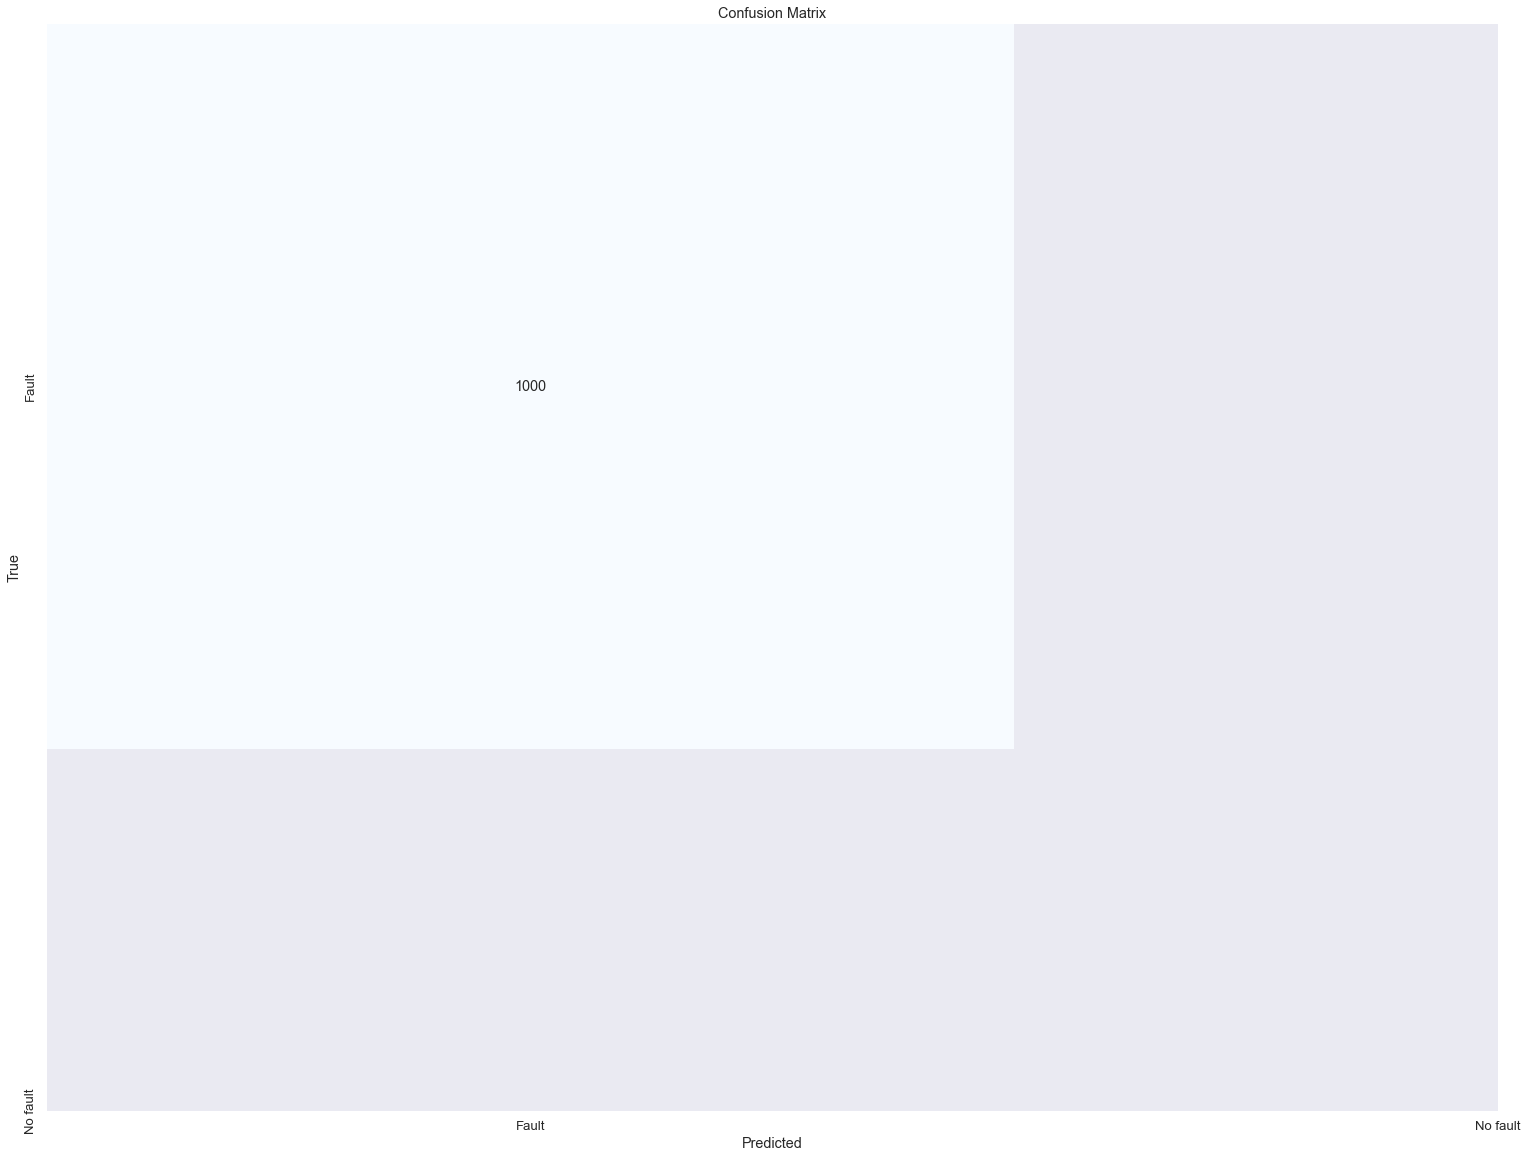

In [86]:
import sys
import traceback
try:
    train()
    wandb.finish()


except Exception as e:
    print(e)
  # exit gracefully, so wandb logs the problem
    print(traceback.print_exc(), file=sys.stderr)
    wandb.finish()
    exit(1)